In [1]:
import numpy as np
from lattice_class import *
from hamiltonian_constructor_class import *
import scipy.linalg
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 150

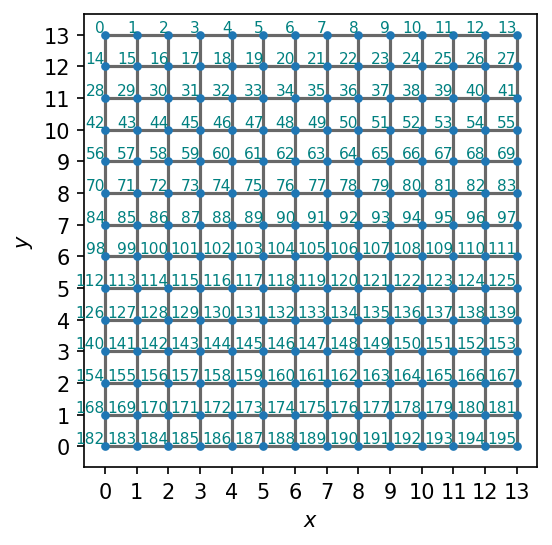

In [2]:
N = 14
lattice = SquareLattice(N, "periodic")

lattice.plot(True)
num_sites = lattice.get_num_sites()

lattice_sites = lattice.get_sites()
lattice_bonds = lattice.get_bonds()
reciprocal_lattice_sites = lattice.get_reciprocal_sites()

Lowest found energy:  4.798388950380152e-08
Index of lowest absolute energy:  391


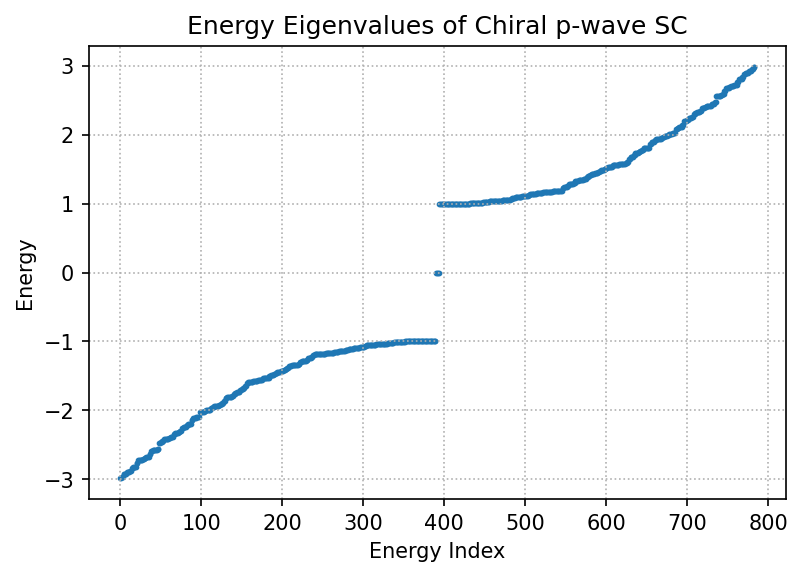

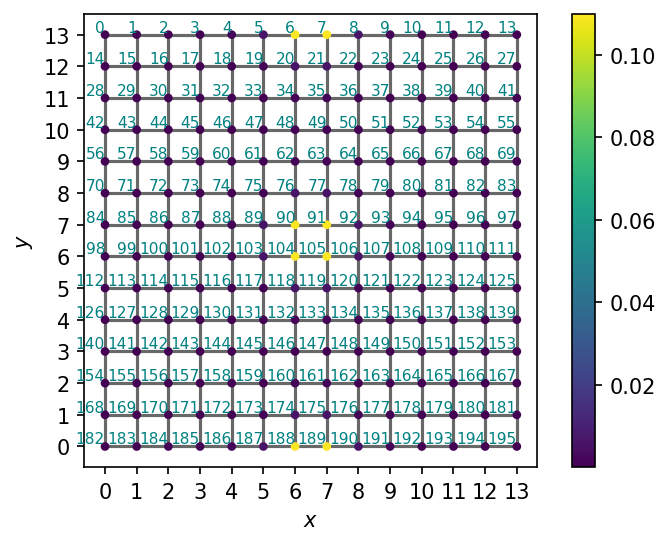

In [3]:
mu = 1.0
t = 1.0
delta = complex(1.0, 0.0)
dim_H_BdG = 4

Ham_constructor = HamiltonianConstructor(mu-2*t, t, t, delta)
H_direct_lattice = Ham_constructor.construct_direct_lattice_hamiltonian(lattice)

for i in range(N // 2, N**2 // 2, N):
    Ham_constructor.add_phase(
        H_direct_lattice, (i, i - 1), np.exp(np.pi * complex(0, 1)), num_sites
    )

energies, states = scipy.linalg.eigh(H_direct_lattice)

print("Lowest found energy: ", np.min(np.abs(energies)))
gs_idx = np.argmin(np.abs(energies))
print("Index of lowest absolute energy: ", gs_idx)

plt.xlabel("Energy Index")
plt.ylabel("Energy")
plt.grid(linestyle=":")
plt.title("Energy Eigenvalues of Chiral p-wave SC")
plt.scatter(range(len(energies)), energies, s=3)
plt.show()

gs_wave_function = states[:, gs_idx]
gs_probabilities_nambu = np.square(np.abs(gs_wave_function))
gs_probabilities = np.zeros(shape=(num_sites, 1))
block_indices = [
    slice(block_idx * dim_H_BdG, (block_idx + 1) * dim_H_BdG)
    for block_idx in range(lattice.get_num_sites())
]

for site_idx in range(num_sites):
    gs_probabilities[site_idx] = np.sum(gs_probabilities_nambu[block_indices[site_idx]])

x_values = [k[0] for k in lattice_sites]
y_values = [k[1] for k in lattice_sites]

sc = lattice.plot(show_idx_bool=True, c=(gs_probabilities))
plt.colorbar(sc)